**INSTRUCTIONS**



1.  The assignment contains four questions. A few bonus questions are mentioned. 
2.   This assignment is due on **6th Feb, 23:59 **(**No Further extensions**).
3.   Assignment must be implemented in Python 3 only.
4.   You are allowed to use libraries for data preprocessing (numpy, pandas etc) and for evaluation metrics, data visualization (matplotlib etc.).
5.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
6.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
7.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
8.   Any attempts at **plagiarism will be penalized heavily**.
9.   Make sure you run and save your notebooks before submission.
10.  For question 3 of the Decision Trees section, output your model's depth first traversal into ```outputimp.txt``` and submit it along with the ipynb file.
10. Naming convention for the ipynb file is ```<roll_number>_assign1.ipynb```
11. Compress your submission files into a zip file with the naming convention: ```<roll_number>_assign1.zip``` and submit in the portal.

#**1) REGRESSION**

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import os
import random

In [2]:
def give_data(to_drop):
    # To read data from diamonds.csv
    headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
    data = pd.read_csv('diamonds.csv', na_values='?',    
             header=None,  names = headers) 
    data = data.reset_index(drop=True)
    data = data.iloc[1:]
    cut_dict = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
    color_dict = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
    clarity_dict = {'I1':1, 'SI2':2, 'SI1':3, 'VS2': 4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

    create_nums = {'cut' : cut_dict, 'clarity':clarity_dict, 'color':color_dict }

    data.replace(create_nums, inplace=True)

    data = data.astype(np.float64, copy=True)

    Y = data['price']
    Y = Y.astype(np.float64)

    data.drop(labels=to_drop, axis=1, inplace=True)
    # TRAIN TEST SPLIT
    X_train, X_test, Y_train, Y_test = train_test_split(data,  Y, test_size=0.20, random_state=40, shuffle=True)
    X_train = np.array(X_train[:30000])  # sub-sampling the data as my machine cannot handle all of it.
    Y_train = np.array(Y_train[:30000])
    X_test = np.array(X_test[:6000])
    Y_test = np.array(Y_test[:6000])
    return X_train, X_test, Y_train, Y_test

In [3]:
# ERROR METRICS
def RSME(Y, Y_hat):
    # Assumed that Y and Y_hat are one dimensional array
    print('RSME metric : ', end='')
    Y = np.array(Y)
    Y_hat = np.array(Y_hat)
    return np.sqrt(np.mean((Y - Y_hat)**2))/Y.shape[0]

def MSE(Y, Y_hat):
    # Assumed that Y and Y_hat are one dimensional array
    print('MSE metric : ', end='')
    Y = np.array(Y)
    Y_hat = np.array(Y_hat)
    return np.mean((Y - Y_hat)**2)/Y.shape[0]

def MAE(Y, Y_hat):
    # Assumed that Y and Y_hat are one dimensional array
    print('MAE metric : ', end='')
    Y = np.array(Y)
    Y_hat = np.array(Y_hat)
    return np.mean(np.abs(Y - Y_hat))/Y.shape[0]

In [4]:
def give_mean(X):
    return np.mean(X, axis=0) # take mean along columns

def give_Variance(X):
    return np.var(X, axis=0) # take variance along the columns

def covariance_matrix(X):
    return np.cov(X.T)  # gives the covariance of the columns

**KNN Regression [Diamond Price Prediction Dataset]**

1. a) Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.

In [5]:
# code for knn regression
class KNNRegression:
    def __init__(self, data=None, Y=None):
        self.data = data  # the data is preprocessed already, normalized(if it is required), etc, numpy array
        self.Y = data # numpy array
    
    def train(self, data, Y):
        self.data = data
        self.Y = Y
        
    def give_dist(self, X, Y, p=2):
        dist = np.sum(np.abs(X - Y) ** p)
        if p == 2:
            return math.sqrt(dist)
        else:
            return dist
    def dist_matrix_manhattan(self, X_test):
        num_test = X_test.shape[0]
        num_train = self.data.shape[0]
        dist_mat = np.zeros((num_test, num_train))
        for i in range(num_test):
            dist_mat[i, :] = np.sum(np.abs(self.data - X_test[i, :]), axis=1)
        return dist_mat
        
    def dist_matrix(self, X):
        dists = -2 * np.dot(X, self.data.T) + np.sum(self.data**2, axis=1) + np.sum(X**2, axis=1)[:, np.newaxis]
        return dists

    def do_regression(self, dist_mat, k, p=2):
        if p > 2 or p <= 0:
            raise NotImplementedError('p can only take two values')
        indices = np.argpartition(dist_mat, k)
        indices = indices[:, :k]
        values = np.take(self.Y, indices)
        return np.mean(values, axis=1)  # take average along the rows

In [6]:
X_train, X_test, Y_train, Y_test = give_data(['price', 'cut', 'clarity', 'color', 'depth', 'table'])
regressor = KNNRegression()
regressor.train(X_train, Y_train)
dists = regressor.dist_matrix_manhattan(X_test)
predicted = regressor.do_regression(dists, k=7)
print(predicted.shape)
print(RSME(Y_test, predicted))
r2 = r2_score(Y_test, predicted)
print('r2 score is :- {a}'.format(a=r2))

(6000,)
RSME metric : 0.24426404341630936
r2 score is :- 0.8682832208462565


1. b) Do we need to normalise data? [If so Does it make any difference?].

In [7]:
# NORMALISE DATA
mean = give_mean(X_train)
var = give_Variance(X_train)
X_train -= mean
X_train /= var
X_test -= mean
X_test /= var

regressor = KNNRegression()
regressor.train(X_train, Y_train)
dists = regressor.dist_matrix(X_test)
predicted = regressor.do_regression(dists, k=7)
print(predicted.shape)
print(RSME(Y_test, predicted))
r2 = r2_score(Y_test, predicted)
print('r2 score is :- {a}'.format(a=r2))

(6000,)
RSME metric : 0.24673852650742942
r2 score is :- 0.8656010263045751


#### Answer
Yes, it generally helps, but in this specific example it does not make much difference.

For classification/Regression algorithms like **KNN**, we measure the **distances** between pairs of samples and these distances are influenced by the measurement units also. For example: Let’s say, we are applying KNN on a data set having 3 features.First feature ranging from 1-10, second from 1-20 and the last one ranging from 1-1000. In this case, most of the clusters will be generated based on the last feature as the difference between 1 to 10 and 1-20 are smaller as compared to 1-1000. To avoid this mis-classification or value prediction, we should normalize the feature variables.

In [8]:
# show all the experiments

print('Manhattan Distance')
dists = regressor.dist_matrix_manhattan(X_test)
predicted = regressor.do_regression(dists, k=7)
print(RSME(Y_test, predicted))
r2 = r2_score(Y_test, predicted)
print('r2 score is :- {a}'.format(a=r2))

print('Euclidean Distance')
dists = regressor.dist_matrix(X_test)
predicted = regressor.do_regression(dists, k=7)
print(RSME(Y_test, predicted))
r2 = r2_score(Y_test, predicted)
print('r2 score is :- {a}'.format(a=r2))

Manhattan Distance
RSME metric : 0.24371112382925386
r2 score is :- 0.8688788579116036
Euclidean Distance
RSME metric : 0.24673852650742942
r2 score is :- 0.8656010263045751


3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [9]:
# report a table
r2 = r2_score(Y_test, predicted)
print('r2 score is :- {a}'.format(a=r2))
print(MAE(Y_test, predicted))
print(MSE(Y_test, predicted))

r2 score is :- 0.8656010263045751
MAE metric : 0.13947561507936507
MSE metric : 365.2794027783447


4.  a) Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k.

In [10]:
# plot
k_values = np.array([2, 3, 5, 7, 11, 16, 19, 23, 27, 39, 43, 47])
r2scores = []
mse = []
mae = []
for k in k_values:
    predicted = regressor.do_regression(dists, k)
    r2scores.append(r2_score(Y_test, predicted))
    mse.append(mean_squared_error(Y_test, predicted))
    mae.append(mean_absolute_error(Y_test, predicted))
r2scores = np.array(r2scores)
mae = np.array(mae)
mse = np.array(mse)

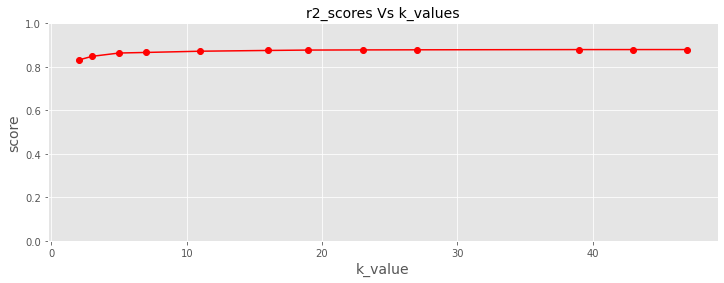

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 4))
plt.plot(k_values, r2scores, color='red', marker='o')
plt.title('r2_scores Vs k_values', fontsize=14)
plt.xlabel('k_value', fontsize=14)
plt.ylabel('score', fontsize=14)
plt.grid(True)
plt.ylim(0,1)
plt.show()

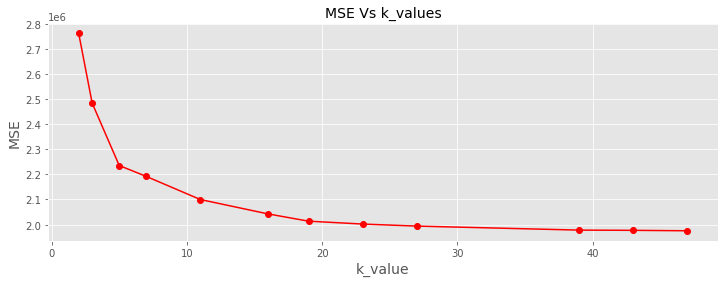

In [12]:
plt.figure(figsize=(12, 4))
plt.plot(k_values, mse, color='red', marker='o')
plt.title('MSE Vs k_values', fontsize=14)
plt.xlabel('k_value', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.grid(True)
plt.show()

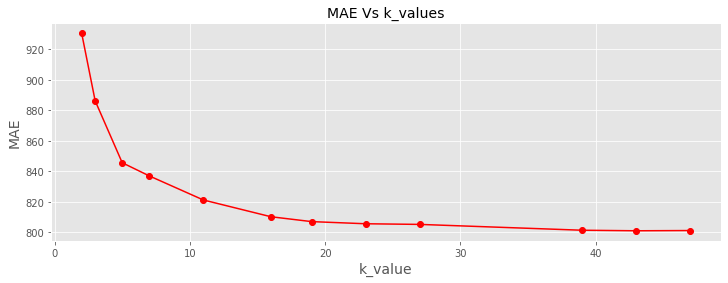

In [13]:
plt.figure(figsize=(12, 4))
plt.plot(k_values, mae, color='red', marker='o')
plt.title('MAE Vs k_values', fontsize=14)
plt.xlabel('k_value', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.grid(True)
plt.show()

4. b) Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

#### Explanation
The R-squared improves a little initially but remains the same after that.
This is because R-squared determines the how better our model explains the data, so when increasing K value initially, the R-squared score improves for points which were mixed up. But on taking more number of neighbours the values can be predicted with less noise as the frequency of most frequent class increases relatively compared to the other classes. This reduces noise in the prediction and improves r2_score. 

Cross Validation for best K :- we can use leave one out cross validation and take the average accuracies for each K. we can compare these values to find the best K value. other metrics can also be used instead of simple accuracy.

5. a) Also, report the performance of scikit-learn’s kNN regression algorithm.  

In [14]:
# scikit-learn KNN Regressor
nn = KNeighborsRegressor(7, p=2, weights='distance')
nn.fit(X_train, Y_train)
y_pred = nn.predict(X_test)
r2 = r2_score(Y_test, y_pred)
print('r2 score is :- {a}'.format(a=r2))
print(MAE(Y_test, y_pred))
print(MSE(Y_test, y_pred))

r2 score is :- 0.861591539658843
MAE metric : 0.14193369668312106
MSE metric : 376.17668009476074


5. b) Compare it with the algorithm you built. [ you can use complexities, R2 score etc..]

In [15]:
# Comparison
data = [[0.865, 365.279, 0.139],
       [0.861, 376.176, 0.142]]
columns = ('r2_score', 'MSE', 'MAE')
rows = ['My Model          ', 'scikit-learn model']
print('\t\t  ', end='')
for col in columns:
    print(col, end='    ')
print()
for i in range(2):
    print(rows[i], end='  ')
    for val in data[i]:
        print(val, end='  ')
    print()

		  r2_score    MSE    MAE    
My Model            0.865  365.279  0.139  
scikit-learn model  0.861  376.176  0.142  


6. From the above experiments, what do you think are advantages and disadvantages of the knn regression algorithm?  report this  along with the experiments



#### Advantages of KNN

1. No Training Period: KNN is called Lazy Learner (Instance based learning). It does not learn anything in the training period. It does not derive any discriminative function from the training data. In other words, there is no training period for it. It stores the training dataset and learns from it only at the time of making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g. SVM, Linear Regression etc. train function of **KNNRegression** class just stores the data. 

2. Since the KNN algorithm requires no training before making predictions, new data can be added seamlessly which will not impact the accuracy of the algorithm. we can add new data by creating another new method **add_data** which will append new data to the existing one.

3. KNN is very easy to implement. There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

#### Disadvantages of KNN

1. Does not work well with large dataset: In large datasets, the cost of calculating the distance between the new point and each existing points is huge which degrades the performance of the algorithm. My machines hangs when the whole dataset is taken, that is the reason for considering only a subset of it.

2. Does not work well with high dimensions: The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension. In the below Classification task KNN performs very poorly on CIFAR-10 dataset by giving around 28% accuracy.

3. Need feature scaling: We need to do feature scaling (standardization and normalization) before applying KNN algorithm to any dataset. If we don't do so, KNN may generate wrong predictions. (explanation was provided in one of the above answers)



# **2)** **Linear Regression**

Dataset - same as above (Diamond Price Detection)


2a) Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. 

Report and Calculate the error obtained.



In [1]:
# Linear Regression
class LinearRegression:
    def __init__(self, train_data, Y):
        self.data = train_data  # It is assumed that data is normalized and shuffled (rows, cols)
        self.Y = Y[:, np.newaxis]
        self.b = np.random.randn()
        print(self.data.shape)
        self.cols = self.data.shape[1]
        self.rows = self.data.shape[0]
        self.weights = np.random.randn(self.cols, 1)  # Initialising weights to 1, shape (cols, 1)
        self.num_iterations = 1000
        self.learning_rate = 0.0001
        self.batch_size = 100
        
    def add_column(self):
        y = np.ones(self.rows)[:, np.newaxis]
        self.data = np.hstack((self.data, y))

    def calc_mini_batches(self):
        new_data = np.hstack((self.data, self.Y))
        np.random.shuffle(new_data)
    
        rem = self.rows % self.batch_size
        num = self.rows // self.batch_size
        till = self.batch_size * num
        if num > 0:
            dd = np.array(np.vsplit(new_data[ :till, :], num))
            X_batch = dd[:, :, :-1]
            Y_batch = dd[:, :, -1]
        
        if rem != 0:
            curr_batch = new_data[till: , :]
            diff = self.batch_size - rem
            temp = np.zeros((diff, self.cols+1)) # appending with zeros so that the sizes can be matched
            curr_batch = np.concatenate((curr_batch, temp))[np.newaxis, :, :]
            if num > 0:
                X_batch = np.concatenate((X_batch, curr_batch[:, :, :-1]))
                Y_batch = np.concatenate((Y_batch, curr_batch[:, :, -1]))
            else:
                X_batch = curr_batch[:, :, :-1]
                Y_batch = curr_batch[:, :, -1]
            
        return X_batch, Y_batch

    def update_weights(self, X, Y):
        Y_Predicted = np.dot(X, self.weights) + self.b  # Remember that X has data stored along the row for one sample
        gradient = np.dot(np.transpose(X), Y_Predicted - Y)
        self.b = self.b - np.sum(Y_Predicted - Y)/(X.shape[0])
        self.weights = self.weights - (self.learning_rate * gradient)/(X.shape[0])
    
    def print_error(self):
        Y_Predicted = self.predict(self.data)
        val = np.sum((Y_Predicted - self.Y) ** 2) / self.rows
        print(val/1000)

    def gradient_descent(self):
        for j in range(self.num_iterations):
            X, Y = self.calc_mini_batches()
            num_batches = X.shape[0]
            for i in range(num_batches):
                self.update_weights(X[i, :, :], Y[i, :][:, np.newaxis])  # update the weights
            if j%20 == 0:
                self.print_error()
    
    def predict(self, X):
        # X is 2 dimensional array, samples along the rows
        return np.dot(X, self.weights) + self.b